## Spam Classifier using Support Vector Machines

Based on Ex6 of the Stanford Machine Learning Course

In [10]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import loadmat
import seaborn as sns
from sklearn import svm

In [16]:
a = os.getcwd()
path1 = a + '\ex6data1.mat'
path2 = a + '\ex6data2.mat'
path3 = a + '\ex6data3.mat'

raw_data1 = loadmat(path1)
raw_data2 = loadmat(path2)
raw_data3 = loadmat(path3)

In [21]:
data1 = pd.DataFrame(raw_data1['X'],columns=['X1','X2'])
data1['y'] = raw_data1['y']

data1.head()

,X1,X2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


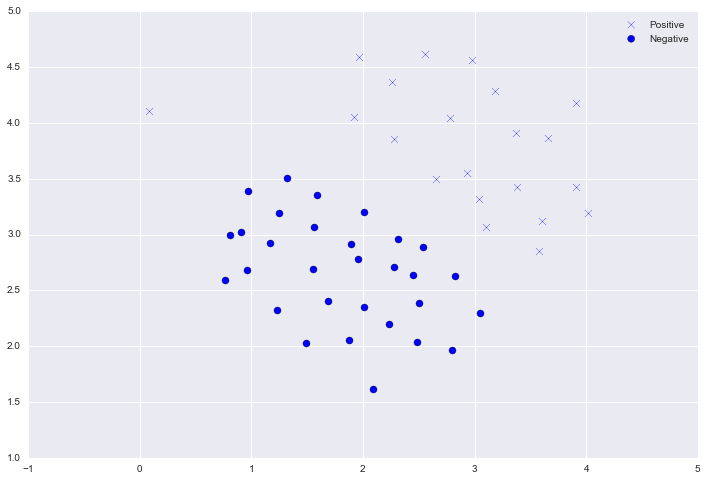

In [20]:
positive = data1[data1['y'].isin([1])]
negative = data1[data1['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'], positive['X2'], s=50, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=50, marker='o', label='Negative')
ax.legend()

Good candidate for SVM, with a clear boundary line between positive and negative values. Also, that one outlier could make our SVM model a little more complicated.

In [24]:
svc = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)
svc

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [26]:
svc.fit(data1[['X1', 'X2']], data1['y'])
svc.score(data1[['X1', 'X2']], data1['y'])

0.98039215686274506

It's probably the outlier that was misclassified - use a higher C value to account for it.

In [31]:
svc2 = svm.LinearSVC(C=100, loss='hinge', max_iter=1000)
svc2.fit(data1[['X1', 'X2']], data1['y'])
svc2.score(data1[['X1', 'X2']], data1['y'])

1.0

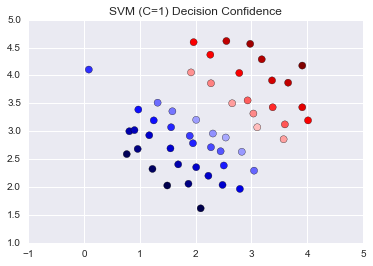

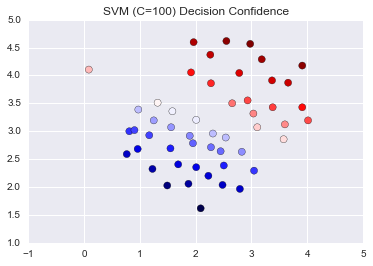

In [34]:
data1['SVM 1 Confidence'] = svc.decision_function(data1[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(data1['X1'], data1['X2'], s=50, c=data1['SVM 1 Confidence'], cmap='seismic')
ax.set_title('SVM (C=1) Decision Confidence')

data1['SVM 2 Confidence'] = svc2.decision_function(data1[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(data1['X1'], data1['X2'], s=50, c=data1['SVM 2 Confidence'], cmap='seismic')
ax.set_title('SVM (C=100) Decision Confidence')

The coloring in the plots above illustrates the difference in the decision boundary for the C=1 and C=100 cases.

Now for the second dataset for spam classification, we will use non-linear SVM to account for the messier decision boundary as shown below

In [36]:
def gaussian_kernel(x1, x2, sigma):
    return np.exp(-(np.sum((x1 - x2) ** 2) / (2 * (sigma ** 2)))) # Implementing gaussian kernel for the SVM

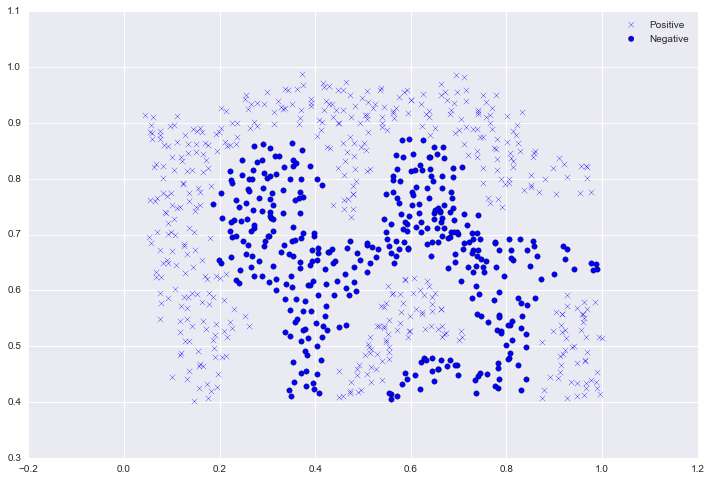

In [37]:
data2 = pd.DataFrame(raw_data2['X'], columns=['X1', 'X2'])
data2['y'] = raw_data2['y']

positive = data2[data2['y'].isin([1])]
negative = data2[data2['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'], positive['X2'], s=30, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=30, marker='o', label='Negative')
ax.legend()

A more complex decision boundary will definitely be required, although it still seems to follow a pattern so overfitting should not be too much of an issue.

In [40]:
svc = svm.SVC(C=100, gamma=10, probability=True)

svc.fit(data2[['X1', 'X2']], data2['y'])
svc.score(data2[['X1', 'X2']], data2['y'])

0.9698725376593279

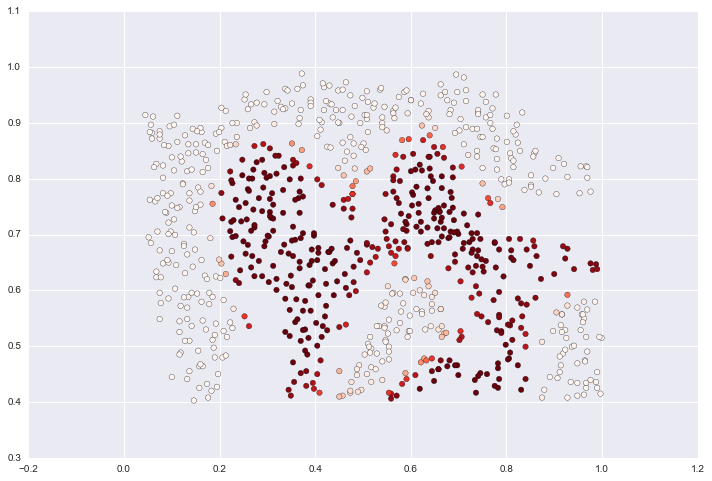

In [41]:
data2['Probability'] = svc.predict_proba(data2[['X1', 'X2']])[:,0]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data2['X1'], data2['X2'], s=30, c=data2['Probability'], cmap='Reds')

There it is! SVM did a pretty good job, with a prediction score of 97%. Now for the last dataset for spam classification.

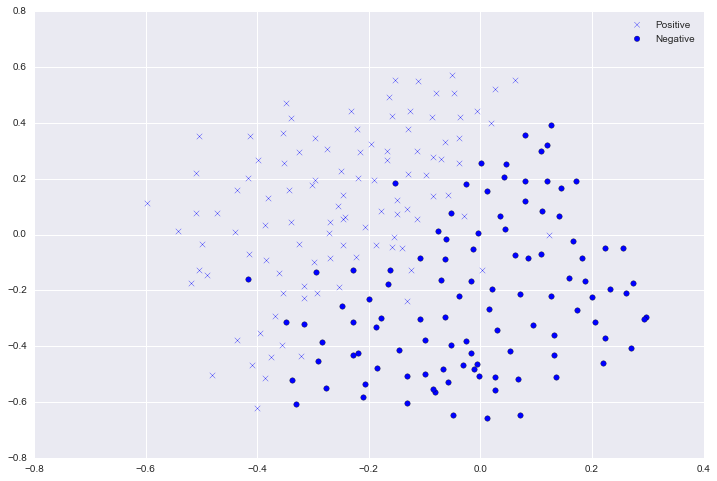

In [52]:
data3 = pd.DataFrame(raw_data3['X'], columns=['X1','X2'])
data3['y'] = raw_data3['y']

positive = data3[data3['y'].isin([1])]
negative = data3[data3['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'], positive['X2'], s=30, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=30, marker='o', label='Negative')
ax.legend()

This last dataset has a pretty complicated format, and it is bound to have some errors in prediction if we want to work with it without overfitting.

We will use a dataset that contains filtered spam email information for this last implementation of SVM.

In [54]:
X = raw_data3['X']
Xval = raw_data3['Xval']
y = raw_data3['y'].ravel()
yval = raw_data3['yval'].ravel()

C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

best_score = 0
best_params = {'C': None, 'gamma': None}

for C in C_values:
    for gamma in gamma_values:
        svc = svm.SVC(C=C, gamma=gamma)
        svc.fit(X, y)
        score = svc.score(Xval, yval)
        
        if score > best_score:
            best_score = score
            best_params['C'] = C
            best_params['gamma'] = gamma

best_score, best_params

(0.96499999999999997, {'C': 0.3, 'gamma': 100})

In [59]:
path4 = a + '\spamTrain.mat'
path5 = a + '\spamTest.mat'

spam_train = loadmat(path4)
spam_test = loadmat(path5)

X = spam_train['X']
Xtest = spam_test['Xtest']
y = spam_train['y'].ravel()
ytest = spam_test['ytest'].ravel()

In [61]:
svc = svm.SVC()
svc.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [62]:
print('Training accuracy = {0}%'.format(np.round(svc.score(X, y) * 100, 2)))

Training accuracy = 94.4%


In [63]:
print('Test accuracy = {0}%'.format(np.round(svc.score(Xtest, ytest) * 100, 2)))

Test accuracy = 95.3%


Test accuracy was greater than Training accuracy, meaning we were able to avoid any overfitting. I'd be pretty comfortable selling a spam filtering service that works 95% of the time, so task accomplished!